In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data_mat = loadmat('ex4data1.mat')
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X,y =data_mat['X'],data_mat['y']
X.shape,y.shape
s1,s2,s3 = 400,25,10

(100, 400)


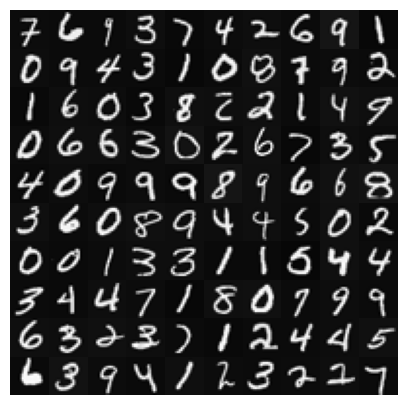

In [4]:
sample_indices = np.random.randint(0, len(X), 100)
samples = X[sample_indices,:]
print(samples.shape)
fig, axes = plt.subplots(10, 10, figsize=(5, 5), gridspec_kw={'wspace': 0, 'hspace': 0})
for i, ax in enumerate(axes.flat):
    imgdata = samples[i,:].reshape(20,20)
    ax.imshow(imgdata.T, cmap='gray')  # 使用灰度色彩映射显示
    ax.axis('off')
plt.show()

In [5]:
theta_mat = loadmat('ex4weights.mat')
theta_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [6]:
theta_l1,theta_l2= theta_mat['Theta1'],theta_mat['Theta2']
theta_l1.shape,theta_l2.shape

((25, 401), (10, 26))

In [7]:
def zFunc(X,theta):
    X = np.insert(X,0,1,axis=1)
    return X @ theta.T
def aFunc(z):
    return 1/(1+np.exp(-z))
def derivativeOfa(z):
    return aFunc(z)*(1-aFunc(z))
def cost(theta1,theta2,X,y):
    z1 = zFunc(X,theta1)
    a2 = aFunc(z1)
    z3 = zFunc(a2,theta2)
    a3 = aFunc(z3)
    return np.sum(-y * np.log(a3) - (1 - y) * np.log(1 - a3))/len(y) 
def reCost(theta1,theta2,X,y,lamda=0):
    m = len(y)
    noRe_cost = cost(theta1,theta2,X,y)
    re = lamda/(2*m)*(np.sum(theta_l1[:,1:]**2)+np.sum(theta_l2[:,1:]**2))
    return noRe_cost+re

In [8]:
z2 = zFunc(X,theta_l1)
a2 = aFunc(z2)
z3 = zFunc(a2,theta_l2)
a3 = aFunc(z3)
print(f'the shape of a3 is:{a3.shape}')

the shape of a3 is:(5000, 10)


In [9]:
y2broadcast = np.tile(np.arange(1,11),(5000,1))
y2vector = (np.tile(y,(1,10)) == y2broadcast).astype(int)
cost(theta_l1,theta_l2,X,y2vector)

0.2876291651613189

In [10]:
reCost(theta_l1,theta_l2,X,y2vector,1)

0.38376985909092365

In [11]:
def W_init(shape,epsilon_init = 0.12):
    W = np.random.uniform(-epsilon_init,epsilon_init,shape)
    return W
W_l1,W_l2 = W_init((s2,s1+1)),W_init((s3,s2+1))
W_l1.shape,W_l2.shape

((25, 401), (10, 26))

In [12]:
theta_l1.shape,theta_l2.shape

((25, 401), (10, 26))

In [13]:
a1 = X
z1 = zFunc(a1,W_l1)
a1 = aFunc(z1)
z2 = 

SyntaxError: invalid syntax (3482443493.py, line 4)